In [1]:
%matplotlib inline

In [2]:
import os
import pickle
import matplotlib.colors as colors
import palettable

In [3]:
import matplotlib.pyplot as plt

In [4]:
import matplotlib

In [5]:
import numpy as np

In [6]:
from configobj import ConfigObj

In [7]:
from matplotlib.colors import ListedColormap

In [8]:
import matplotlib.patches as patches

### general style/labels used throughout the notebook

In [9]:
# Physics of Plasmas figure sizes
OneColWidth = 3.37
TwoColWidth = 6.69

PairedColor = {"UU" : palettable.colorbrewer.qualitative.Paired_8.mpl_colors[4],
               "UUC" : palettable.colorbrewer.qualitative.Paired_8.mpl_colors[5],
               "UUA" : palettable.colorbrewer.qualitative.Paired_8.mpl_colors[4],
               "UBT" : palettable.colorbrewer.qualitative.Paired_8.mpl_colors[0],
               "UBTb" : palettable.colorbrewer.qualitative.Paired_8.mpl_colors[0],
               "UBP" : palettable.colorbrewer.qualitative.Paired_8.mpl_colors[1],
               "UBPbb" : palettable.colorbrewer.qualitative.Paired_8.mpl_colors[1],
               "UB" : palettable.colorbrewer.qualitative.Paired_8.mpl_colors[1],
               "BUT" : palettable.colorbrewer.qualitative.Paired_8.mpl_colors[2],
               "BUP" : palettable.colorbrewer.qualitative.Paired_8.mpl_colors[3],
               "BUPbb" : palettable.colorbrewer.qualitative.Paired_8.mpl_colors[3],
               "BU" : palettable.colorbrewer.qualitative.Paired_8.mpl_colors[3],
               "BB" : palettable.colorbrewer.qualitative.Paired_8.mpl_colors[6],               
               "BBC" : palettable.colorbrewer.qualitative.Paired_8.mpl_colors[7],  
               "BBA" : palettable.colorbrewer.qualitative.Paired_8.mpl_colors[6],
               "FU" : palettable.colorbrewer.qualitative.Paired_12.mpl_colors[9],  
               "PU" : palettable.colorbrewer.qualitative.Paired_12.mpl_colors[11],
              }

Labels = {
    "UU" : '$\mathcal{T}_\mathrm{UU}$',    
    "UUA" : '$\mathcal{T}_\mathrm{UUa}$',
    "UUC" : '$\mathcal{T}_\mathrm{UUc}$',
    "BB" : '$\mathcal{T}_\mathrm{BB}$',
    "BBA" : '$\mathcal{T}_\mathrm{BBa}$',
    "BBC" : '$\mathcal{T}_\mathrm{BBc}$',
    "BUT" : '$\mathcal{T}_\mathrm{BUT}$',
    "BUP" : '$\mathcal{T}_\mathrm{BUP}$',
    "BUPbb" : '$\mathcal{T}_\mathrm{BUP}$',
    "UBPbb" : '$\mathcal{T}_\mathrm{UBP}$',
    "UBPb" : '$\mathcal{T}_\mathrm{UBP}$',
    "UBPbA" : '$\mathcal{T}_\mathrm{UBPa}$',
    "UBPbC" : '$\mathcal{T}_\mathrm{UBPc}$',
    "UBTb" : '$\mathcal{T}_\mathrm{UBT}$',
    "UBTbA" : '$\mathcal{T}_\mathrm{UBTa}$',
    "UBTbC" : '$\mathcal{T}_\mathrm{UBTc}$',
    "FU" : '$\mathcal{T}_\mathrm{FU}$',
    "PU" : '$\mathcal{T}_\mathrm{PU}$',
    "M0.5b72" : r'$\mathrm{Ms} \approx 0.57$',
    "M2b5-HLL" : r'$\mathrm{Ms} \approx 2.57$',
    "OctNorm" : "octave",
    "WWnorm" : "linear",
}

IdLabels = {#"Enzo1024M0.5b72":r'$\mathtt{I-Enzo}$',
    "Enzo1024M0.5b72":r'$\mathtt{M0.5-Enzo}$',
       #"Enzo1024M2b5-HLL":r'$\mathtt{II-Enzo}$',
            "Enzo1024M2b5-HLL":r'$\mathtt{M2.5-Enzo}$',
 '512AthenaM0.5b72':"$512^3$ Athena VL CT HLLD Forcing: sol. dt=1e-3T",
 '512AthenaM2b5':r'$\mathtt{II-Athena}$',
 '512AthenaM0.5b72-CTU':"$512^3$ Athena CTU CT Roe Forcing: sol. dt=1e-3T",
 'EnzoM0.5b72Sol':"$512^3$ Enzo MUSCL Dedner HLLD Forcing: sol. evol",
 'EnzoM2b5-HLLSol':"$512^3$ Enzo MUSCL Dedner HLL Forcing: sol. evol",
 'AthenaM2b5-HLLE':"$512^3$ Athena VL CT HLL Forcing: sol. dt=1e-3",
 'Athena512M0.5b72-longDt0.2':r'$\mathtt{I-Athena512}$',
 #'Athena1024M0.5b72-longDt0.2':r'$\mathtt{I-Athena}$',
    'Athena1024M0.5b72-longDt0.2':r'$\mathtt{M0.5-Athena}$',
 #'Athena1024M2b5-longDt0.2':r'$\mathtt{II-Athena}$',
'Athena1024M2b5-longDt0.2':r'$\mathtt{M2.5-Athena}$',    
 'AthenaM0.5b72-longDt0.5':"$512^3$ Athena VL CT HLLD Forcing: sol. dt=0.5T",
 'AthenaM0.5b72-longDt0.75':"$512^3$ Athena VL CT HLLD Forcing: sol. dt=0.75T",
 'AthenaM0.5b72-longDt1':"$512^3$ Athena VL CT HLLD Forcing: sol. dt=1T",
              'Athena512M0.5-hydro':"$512^3$ Athena VL CT HLLC Forcing: sol. dt=1e-3",
              '1024SpectralM1b1':r'$\mathtt{Spectral}$',
    'Athena512M2b5-longDt0.2':r'$\mathtt{M2.5-Athena}$',
           }

In [10]:
def createSimDict(firstId,lastId,AnaRess):
    return {
        "firstId": firstId,
        "lastId": lastId,
        "AnaRess" : AnaRess,
    }

### NOTE: the following three lines need to be changed/updated to reflect local data

In [11]:
Simulations = {    
    "Athena512M2b5-longDt0.2" : createSimDict(200,250,[512]),
              }

In [12]:
#Ids = ['Athena512M2b5-longDt0.2',       
#      ]
Ids = Simulations.keys()

In [13]:
RootDir = '/mnt/home/gretephi/src/energy-transfer-analysis/testing/'

# Reading energy transfer data

In [14]:
Results = {}

### NOTE: The split file version (All-Log and Forc-Pres) in reading below is only due to analysis being run separately for those terms.

In [15]:

Formalism = "WW"

for Id in Ids:
    
    Results[Id] = {}
        
    for AnaRes in Simulations[Id]["AnaRess"]:
        
        Results[Id][AnaRes] = {}
        readFiles = 0 
        readForceFiles = 0 
        
        for Dump in np.arange(Simulations[Id]["firstId"],
                              Simulations[Id]["lastId"]+1):

        
        
            Dir = RootDir + Id

            File = Dir + "/" + str(Dump).zfill(4) +  "-All-Log-" + str(AnaRes) + ".pkl"
            if not os.path.isfile(File):
                print("missing " + File)
                continue
            
            Results[Id][AnaRes][Dump] = {}
            Results[Id][AnaRes][Dump][Formalism] = {}
            Results[Id][AnaRes][Dump][Formalism]["ScaleByScaleRaw"] = {}
            Results[Id][AnaRes][Dump][Formalism]["ScaleByScaleRaw"]["Log"] = {}            

            try:
                #Res = pickle.load(open(File,"rb"),encoding='latin1')
                Res = pickle.load(open(File,"rb"))
                for Key in Res["WW"].keys():
                    Results[Id][AnaRes][Dump][Formalism]["ScaleByScaleRaw"]["Log"][Key] = Res["WW"][Key]                                
                
                readFiles += 1
                
                ForcPresFile = Dir + "/" + str(Dump).zfill(4) +  "-Forc-Pres-Log-" + str(AnaRes) + ".pkl"
                
                if not os.path.isfile(ForcPresFile):
                    continue
                

                
                Res = pickle.load(open(ForcPresFile,"rb"))
                for Key in Res["WW"].keys():
                    Results[Id][AnaRes][Dump][Formalism]["ScaleByScaleRaw"]["Log"][Key] = Res["WW"][Key]
                     
                readForceFiles += 1
                
            except:
                del Results[Id][AnaRes][Dump]
                print("bad file " + File + " - dump removed")
        print("Got %d dumps (+ %d forc-pres) for %s at res %d" % (readFiles,readForceFiles,Id,AnaRes))

            


Got 51 dumps (+ 51 forc-pres) for Athena512M2b5-longDt0.2 at res 512


In [16]:
# we save the dump keys specifically as we later use "dumps" for the mean, std etc. values
for Id in Ids:
    Simulations[Id]["DumpKeys"] = {}
    for AnaRes in Simulations[Id]["AnaRess"]:        
         Simulations[Id]["DumpKeys"][AnaRes] = Results[Id][AnaRes].keys()#[e for e in Results[Id][AnaRes].keys() if (isinstance(e, int) )]
    

## debug cleaning keys for missing data files

### Calculate the energy flux across scales

In [17]:
def BinToK(KBin):
    Low, Up = KBin.split("-")
    
    return (float(Up) + float(Low))/2.

In [18]:
def getSortedBinEdges(Keys):
    res = []
    for BinString in sorted(Keys,key=BinToK):
        Low, Up = BinString.split("-")
        res.append(float(Low))
    res.append(float(Up))
    
    return res
    
    

In [19]:
for Id in Ids:        
        
    for AnaRes in Simulations[Id]["AnaRess"]:  
        
        for Dump in Simulations[Id]["DumpKeys"][AnaRes]:
            
            Results[Id][AnaRes][Dump][Formalism]["CrossScale"] = {}        

            #for Term in ["UU","BUT","BUPbb","BB","UBTb","UBPbb"]:
            for Term in Results[Id][AnaRes][Dump][Formalism]["ScaleByScaleRaw"]["Log"].keys():


                X = []
                Y = []
                
                thisTerm = Results[Id][AnaRes][Dump][Formalism]["ScaleByScaleRaw"]["Log"][Term]["AnyToAny"]                                

                # exlcude the outermost edges as there's no transfer across that scale
                for smallK in getSortedBinEdges(thisTerm.keys())[1:-1]:

                    tmp = 0.
                    for KBin in sorted(thisTerm.keys(),key=BinToK):

                        K = BinToK(KBin)

                        for QBin in sorted(thisTerm.keys(),key=BinToK):
                            Q = BinToK(QBin)

                            if Q >= smallK or K < smallK:
                                continue

                            tmp += Results[Id][AnaRes][Dump][Formalism]["ScaleByScaleRaw"]["Log"][Term]["AnyToAny"][KBin][QBin]

                    X.append(smallK)
                    Y.append(tmp)                

                Results[Id][AnaRes][Dump][Formalism]["CrossScale"][Term] = np.array([X,Y])

### total flux in the "intertial range" for each dump
used for normalization

In [20]:
#Results[Id][AnaRes][Dump][Formalism]["CrossScale"][Term]

In [21]:
BBTerms = ["UUA","UUC","BUT","BUPbb","UBTb","UBPbb","BBA","BBC","FU","PU"]

In [22]:
AllTerms = ["UU","UUA","UUC","BB","BBA","BBC","BUPbb","UBPbb","BUT","UBTb","FU","PU"]

### NOTE: With Low/Up one specifies the internal range that is used to calc the mean fluxes for normalization

In [23]:
# these are the bounds for the intertial range
# eye by chi or what was it?
Low = 7.
Up = 16.

for Id in Ids:        
        
    for AnaRes in Simulations[Id]["AnaRess"]:  
        
        for Dump in Simulations[Id]["DumpKeys"][AnaRes]:        
        
        
            Results[Id][AnaRes][Dump][Formalism]["MeanInertial"] = {}
            total = 0.

            for Term in BBTerms:

                thisTerm = Results[Id][AnaRes][Dump][Formalism]["CrossScale"][Term]

                inertialMask = np.logical_and(thisTerm[0] >= Low,
                                              thisTerm[0] <= Up)

                # this was total
                thisFlux = np.mean(thisTerm[1][inertialMask])

                Results[Id][AnaRes][Dump][Formalism]["MeanInertial"][Term] = thisFlux
                total += thisFlux

            Results[Id][AnaRes][Dump][Formalism]["MeanInertial"]["Total"] = total
            



### calcuate the mean normalized scale to scale transfers

In [24]:
#Results[Id][AnaRes][Dump][Formalism]["ScaleByScaleRaw"]["Log"][Term]["AnyToAny"]

In [25]:
for Id in Ids:        
        
    for AnaRes in Simulations[Id]["AnaRess"]:
        
        Results[Id][AnaRes]["Mean"] = {} 
        Results[Id][AnaRes]["Mean"][Formalism] = {}
        Results[Id][AnaRes]["Mean"][Formalism]["ScaleByScaleRaw"] = {}
        Results[Id][AnaRes]["Mean"][Formalism]["ScaleByScaleRaw"]["Log"] = {}                

        for Term in AllTerms:

            Results[Id][AnaRes]["Mean"][Formalism]["ScaleByScaleRaw"]["Log"][Term] = {}
            Results[Id][AnaRes]["Mean"][Formalism]["ScaleByScaleRaw"]["Log"][Term]["AnyToAny"] = {}
            thisTerm = Results[Id][AnaRes]["Mean"][Formalism]["ScaleByScaleRaw"]["Log"][Term]["AnyToAny"]
            
            SomeDump = Simulations[Id]["DumpKeys"][AnaRes][0]
            Keys = Results[Id][AnaRes][SomeDump][Formalism]["ScaleByScaleRaw"]["Log"][Term]["AnyToAny"].keys()
                            
            for KBin in sorted(Keys,key=BinToK):                
                thisTerm[KBin] = {}                 

                for QBin in sorted(Keys,key=BinToK):
                    tmp = []
                    for Dump in Simulations[Id]["DumpKeys"][AnaRes]:
                        tmp.append(Results[Id][AnaRes][Dump][Formalism]["ScaleByScaleRaw"]["Log"][Term]["AnyToAny"][KBin][QBin]/
                                   Results[Id][AnaRes][Dump][Formalism]["MeanInertial"]["Total"])
                    thisTerm[KBin][QBin] = np.array([np.mean(tmp),np.std(tmp)])                   
            
        



### calculate mean inertial energy flux

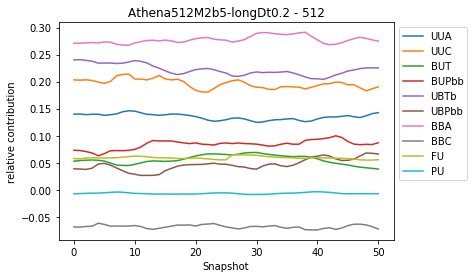

In [26]:
fig = plt.figure()
ax = None



for Id in Ids:
    if ax is None:
        ax = fig.add_subplot(111)
    else:
        n = len(fig.axes)
        for i in range(n):
            fig.axes[i].change_geometry(1,n+ 1, i+1)
            ax = fig.add_subplot(1,n+ 1, n+1)
        
    for AnaRes in Simulations[Id]["AnaRess"]:
        Results[Id][AnaRes]["Mean"][Formalism]["MeanInertial"]  = {}
        for Term in BBTerms: 

            Y = []
            for Dump in Simulations[Id]["DumpKeys"][AnaRes]:                
                Y.append(Results[Id][AnaRes][Dump][Formalism]["MeanInertial"][Term]/
                         Results[Id][AnaRes][Dump][Formalism]["MeanInertial"]["Total"])
            ax.set_title("%s - %d" % (Id,AnaRes))
            ax.plot(Y,label=Term)

            Results[Id][AnaRes]["Mean"][Formalism]["MeanInertial"][Term] = [np.mean(Y),np.std(Y)]

ax.legend(loc="upper left",bbox_to_anchor=(1.,1.))  
#fig.tight_layout()
plt.xlabel("Snapshot")
plt.ylabel("relative contribution")
plt.show()

In [27]:
def AddMeanInertialHorizontalBar(ax,xPos,Id,AnaRes,Formalism,Term):
    
    bottomNeg = 0.
    bottomPos = 0.
        
    for i,Term in enumerate(BBTerms):
        if Term == "PU" or Term == "FU":
            continue
        
        thisTerm = Results[Id][AnaRes]["Mean"][Formalism]["MeanInertial"][Term]
        print("%s\t%s\t%.3f\t%.5f" % (IdLabels[Id],Term,thisTerm[0],thisTerm[1]))
        ax.bar(xPos - 0.4 + i * 0.1, thisTerm[0], 0.1,
               yerr=thisTerm[1],
               color=PairedColor[Term],
               #color="C%d" % k,
              label=Labels[Term])     

$\mathtt{M2.5-Athena}$	UUA	0.135	0.00558
$\mathtt{M2.5-Athena}$	UUC	0.196	0.00840
$\mathtt{M2.5-Athena}$	BUT	0.056	0.00848
$\mathtt{M2.5-Athena}$	BUPbb	0.084	0.00799
$\mathtt{M2.5-Athena}$	UBTb	0.222	0.01014
$\mathtt{M2.5-Athena}$	UBPbb	0.046	0.01076
$\mathtt{M2.5-Athena}$	BBA	0.278	0.00666
$\mathtt{M2.5-Athena}$	BBC	-0.068	0.00313


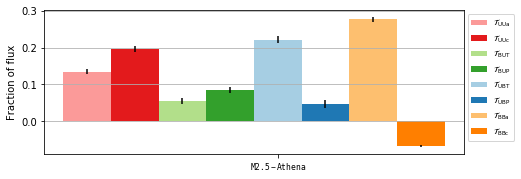

In [28]:


fig, p = plt.subplots(1,1,figsize=(TwoColWidth,OneColWidth/1.3))


XLabels = []
XPoss = []
XPos = 0


for i,Id in enumerate(Ids):

    for AnaRes in Simulations[Id]["AnaRess"]:
        
        XPoss.append(XPos)


        XLabels.append(IdLabels[Id])

        AddMeanInertialHorizontalBar(p,XPos,Id,AnaRes,Formalism,Term)

        XPos += 1
    
       

handles, labels = p.get_legend_handles_labels()
lenHandles = len(handles)
p.legend(handles[:lenHandles/len(XLabels):1], labels[:lenHandles//len(XLabels):1],
        fontsize=8,bbox_to_anchor=(1.,1),loc="upper left",ncol=1)

p.yaxis.grid()

p.set_ylabel("Fraction of flux")
p.set_xticks(XPoss)
p.set_xticklabels(XLabels, rotation=0,fontsize=8)

fig.tight_layout()
#fig.savefig("W20-FracInertialFlux.pdf",dpi=150,bbox_inches="tight")


### Cross scale transport!

In [29]:
#Results[Id][AnaRes][Dump][Formalism]["MeanInertial"]["Total"]
#Results[Id][AnaRes][Dump][Formalism]["CrossScale"][Term]

In [30]:
Ids

['Athena512M2b5-longDt0.2']

Fix me: dirty array hack so that we can work with 2 indices even for one dataset
Fix me: lower and upper bounds set independent of data


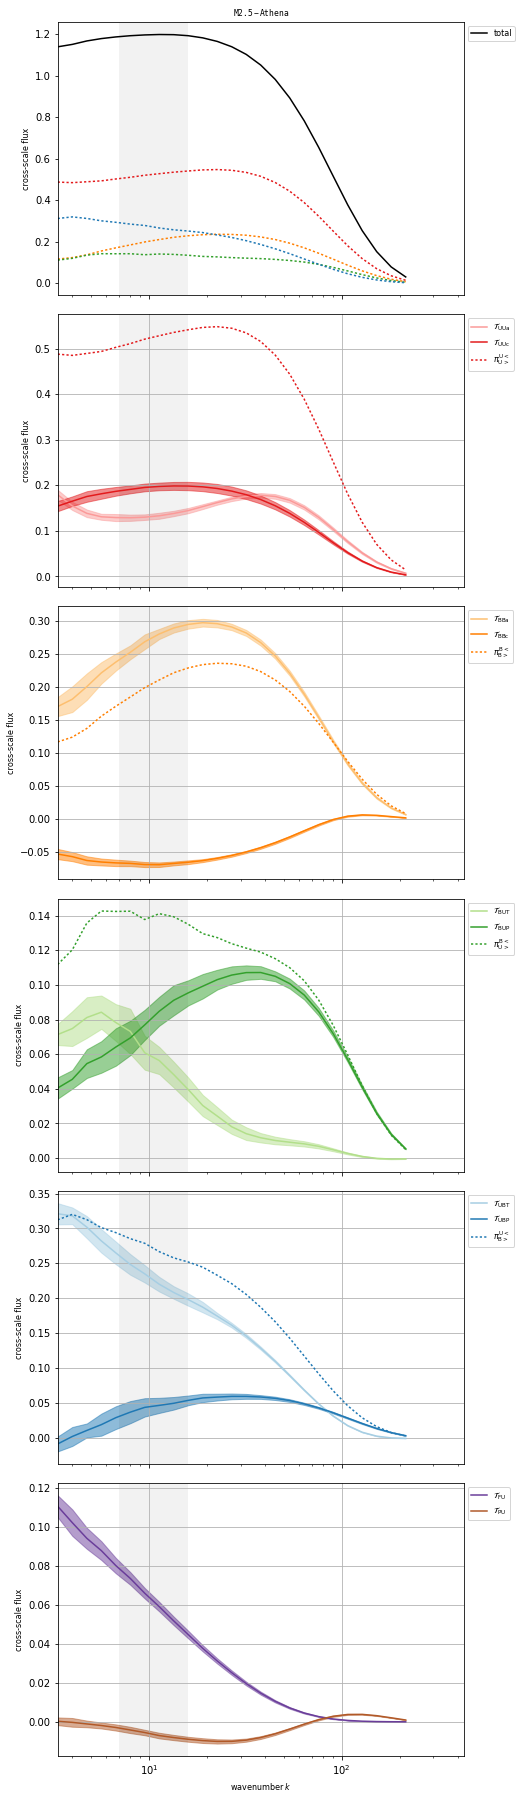

In [31]:
TermsToPlot = [
               ["UUA","UUC"],
               ["BBA","BBC"],
               ['BUT', 'BUPbb'],
               ['UBTb', 'UBPbb'],
    ['FU','PU']
              ]

SumLabels = ['total',
             '$\pi^{\mathrm{U}<}_{\mathrm{U}>}$',
             '$\pi^{\mathrm{B}<}_{\mathrm{B}>}$',
             '$\pi^{\mathrm{B}<}_{\mathrm{U}>}$',
             '$\pi^{\mathrm{U}<}_{\mathrm{B}>}$']
             

    
NumRows = len(TermsToPlot) + 1
#fig, p = subplots(NumRows,len(Ids),sharey='row',
#                  sharex=True,figsize=(33/2.54,18.8/2.54/4. * NumRows))
fig, p = plt.subplots(NumRows,len(Ids),sharey='row',
                  sharex=True,figsize=(TwoColWidth,TwoColWidth/1.6*6./float(len(Ids))))

p = np.array([p]).T
print("Fix me: dirty array hack so that we can work with 2 indices even for one dataset")


low = 7#[7,7,7,7,7]
up = 16#[30,30,30,30,30]
print("Fix me: lower and upper bounds set independent of data")


for i,Id in enumerate(Ids):
    
    for AnaRes in Simulations[Id]["AnaRess"]:
    #for AnaRes in [1024]:
        
        AllTot = None
    
        for j,Terms in enumerate(TermsToPlot):
            

                
            j += 1

            Max = 0.
            YTot = None
            for Term in Terms:


                X = []
                Y = []
                for Dump in Simulations[Id]["DumpKeys"][AnaRes]: 
                    X.append(Results[Id][AnaRes][Dump][Formalism]["CrossScale"][Term][0])
                    Y.append(Results[Id][AnaRes][Dump][Formalism]["CrossScale"][Term][1]/
                             Results[Id][AnaRes][Dump][Formalism]["MeanInertial"]["Total"])

                #print(np.std(X,axis=0))
                #break
                if (~np.isclose(np.std(X,axis=0),0.)).any():
                    print("Careful, you're mixing binning, check data - %s %d" % (Id,AnaRes))
                X = np.mean(X,axis=0)
                YStd = np.std(Y,axis=0)
                Y = np.mean(Y,axis=0)

                #p[j,i].errorbar(X,Y,
                #            yerr=YStd,
                #            label=Labels[Term],color=PairedColor[Term])
                p[j,i].plot(X,Y,
                            #yerr=YStd,
                            label=Labels[Term],color=PairedColor[Term])
                p[j,i].fill_between(X,Y-YStd,Y+YStd,
                            color=PairedColor[Term],
                            alpha=0.5)
                
                #p[0,i].plot(X,Y,color=PairedColor[Term])

                if YTot is None:
                    YTot = Y
                else:
                    YTot += Y
                    
                if AllTot is None:
                    AllTot = Y
                else:
                    AllTot += Y

            if not ("FU" == Terms[0]):
                p[j,i].plot(X,YTot,":",
                            #yerr=np.std(Y,axis=0),
                            label=SumLabels[j],color=PairedColor[Term])
                p[0,i].plot(X,YTot,":",
                            #yerr=np.std(Y,axis=0),
                            #label=SumLabels[j],
                            color=PairedColor[Term],
                           )
            #.fill_between([low[i],up[i]],[Max,Max],color="black",alpha=0.05)
            
            p[j,i].set_xscale("log")
            p[j,i].grid()
            p[j,i].set_xlim(3.36,431.)
           
            
            p[0][i].set_title(IdLabels[Id],fontsize=8)
            p[-1,i].set_xlabel("wavenumber $k$",fontsize=8)
        
        p[0,i].plot(X,AllTot,color="black",label="total")

for j in range(NumRows):
    p[j][0].set_ylabel("cross-scale flux",fontsize=8)
    p[j][-1].legend(loc="upper left",bbox_to_anchor=(1.,1.),
                           bbox_transform=p[j][-1].transAxes,
                           fontsize=8,
                          )                   
    for i in range(len(Ids)):
        p[j,i].axvspan(low,up, facecolor='black', alpha=0.05)
        
fig.tight_layout()
fig.subplots_adjust(wspace=0.07,hspace=0.07)


#fig.suptitle("Comparing constancy of individual fluxes in the inertial range")
#fig.savefig("W20-cross-scale-fluxes-individual.pdf",dpi=150,bbox_inches="tight")

### All to one transfer

In [32]:
def getData(Id,Dump,Type,Term,K,inverse=False,totFlux=False,err=False): 
    """
    totFlux :  bool
        return the total flux to a specific wavenumber from all wavenumbers
    """
    
    X = []
    Y = []
    
    #if K is None:
    if "Log" in Type:
        Strings = LogBinStrings
        KBin = LogBinFromK(K)
    elif Type[0:3] == "Oct":
        Strings = OctBinStrings
        KBin = OctBinFromK(K)
    else:
        Strings = LinBinStrings
        KBin = LinBinFromK(K)
        
    for Key in Strings: #sorted(data.keys()):
        if Type[0:3] == "Oct":
            X.append(OctBinToK(Key))
        else:
            X.append(BinToK(Key))
        #X.append(K)
        if not totFlux:
            if not inverse:            
                Y.append(Results[Id][Dump][Type][Term]["AnyToAny"][KBin][Key])

            else:            
                Y.append(-Results[Id][Dump][Type][Term]["AnyToAny"][Key][KBin])
        
        # getting totFlux
        else:
             # Key is the KBin here, i.e. the bin where energy goes in and out from all other bins (Qbin)           
            tmp = 0.
            
            for QBin in Strings:
                if err:
                    tmp += (Results[Id][Dump][Type][Term]["AnyToAny"][Key][QBin]**2.) 
                else:
                    tmp += (Results[Id][Dump][Type][Term]["AnyToAny"][Key][QBin]) 
            if err:
                Y.append(np.sqrt(tmp))
            else:
                Y.append(tmp)
    
    return np.array(X), np.array(Y)

In [33]:
#thisTerm = Results[Id][AnaRes]["Mean"][Formalism]["ScaleByScaleRaw"]["Log"][Term]["AnyToAny"]

In [34]:
def LogBinToCenterK(KBin,printOnce=np.array([False])):
    Low, Up = KBin.split("-")
    Low = float(Low)
    Up = float(Up)
    if Low == 0.:
        Low = 1.        
        #print("Fixed left Bin edge K = 1 rather than 0")
    
    if printOnce[0]:
        #print("Careful, assuming log bins on base 2 here!")
        printOnce[0] = False    
    return 2**((np.log2(Up) + np.log2(Low))/2.)

In [35]:
def getTotalTransport(thisTerm):
    X = []
    Y = []
    Yerr = []
    printOnce = np.array([True])

    for KBin in sorted(thisTerm.keys(),key=BinToK):
        Low, Up = KBin.split("-")
        X.append(float(Low))

        X.append(LogBinToCenterK(KBin,printOnce))
        X.append(float(Up))

        tmp = 0.
        tmpStd = 0.
        for QBin in sorted(thisTerm[KBin].keys(),key=BinToK):
            
            # if this is raw data, i.e. no list of mean and std val
            if isinstance(thisTerm[KBin][QBin],float):
                tmp += thisTerm[KBin][QBin]
            else:
                tmp += thisTerm[KBin][QBin][0]
                tmpStd += thisTerm[KBin][QBin][1]**2.


        Y.append(tmp)
        Y.append(tmp)
        Y.append(tmp)

        Yerr.append(0.)
        Yerr.append(np.sqrt(tmpStd))
        Yerr.append(0.)


        
    return np.array(X),np.array(Y),np.array(Yerr   )


Fix me: dirty array hack so that we can work with 2 indices even for one dataset
Fix me: lower and upper bounds set independent of data


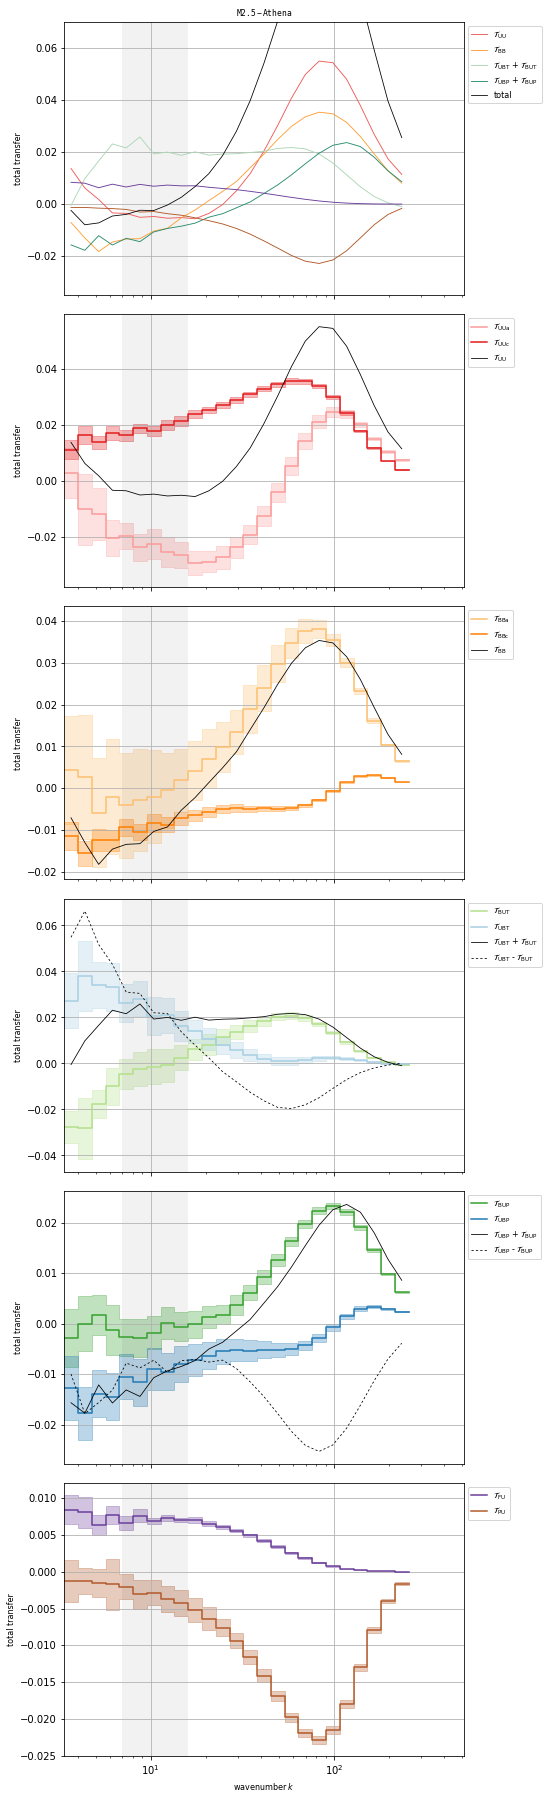

In [36]:
TermsToPlot = [
               ["UUA","UUC"],
               ["BBA","BBC"],
               ['BUT', 'UBTb'],
               ['BUPbb', 'UBPbb'],
    ['FU','PU']
              ]

SumLabels = ['',
             'kin. adv.',
             'mag. adv.',
             'mag. tens.',
             'mag. pres.',             
            ]
             
SumLabels = ['',
             Labels["UU"],
             Labels["BB"],
             '%s + %s' % (Labels['UBTb'],Labels['BUT']),
             '%s + %s' % (Labels['UBPbb'],Labels['BUPbb']),            
            ]
SumLabelsNeg = ['',
             Labels["UU"],
             Labels["BB"],
             '%s - %s' % (Labels['UBTb'],Labels['BUT']),
             '%s - %s' % (Labels['UBPbb'],Labels['BUPbb']),             
            ]    
NumRows = len(TermsToPlot) + 1
#fig, p = subplots(NumRows,len(Ids),sharey='row',
#                  sharex=True,figsize=(33/2.54,18.8/2.54/4. * NumRows))
fig, p = plt.subplots(NumRows,len(Ids),sharey='row',
                  sharex=True,figsize=(TwoColWidth,TwoColWidth/1.6*6./float(len(Ids))))

p = np.array([p]).T
print("Fix me: dirty array hack so that we can work with 2 indices even for one dataset")


low = 7#[7,7,7,7,7]
up = 16#[30,30,30,30,30]
print("Fix me: lower and upper bounds set independent of data")

for i,Id in enumerate(Ids):
    
    for AnaRes in Simulations[Id]["AnaRess"]:
    #for AnaRes in [1024]:
    
        YTot = None
        for j,Terms in enumerate(TermsToPlot):
           
            j += 1

            Max = 0.
            
            YSubTot = None
            YSubDiff = None
            
            totMask = slice(1,None,3)
            for Term in Terms:
                
                thisTerm = Results[Id][AnaRes]["Mean"][Formalism]["ScaleByScaleRaw"]["Log"][Term]["AnyToAny"]

                X, Y, Yerr = getTotalTransport(thisTerm)
                
                #if Term[0:2] == "BU":
                #    Y *= -1.
                
                mask = slice(3,None,None)
                #p[j,i].errorbar(X[3:],Y[3:],
                #            yerr=Yerr[3:],
                #            label=Labels[Term],color=PairedColor[Term[0:3]])
                p[j,i].plot(X[mask],Y[mask],                            
                            label=Labels[Term],color=PairedColor[Term])
                
                if Terms[0] == 'FU':
                    
                    p[0,i].plot(X[mask][totMask],Y[mask][totMask],                            
                            color=PairedColor[Term],lw=0.9,
                               # label=Labels[Term]
                               )
                
                    
                
                Xfill = np.dstack((X[mask][::3],X[mask][2::3])).reshape(-1)
                
                
                Ylowfill = np.dstack(((Y[mask][::3] - Yerr[mask][1::3]),(Y[mask][2::3] - Yerr[mask][1::3]))).reshape(-1)
                Yupfill = np.dstack(((Y[mask][::3] + Yerr[mask][1::3]),(Y[mask][2::3] + Yerr[mask][1::3]))).reshape(-1)
                
                p[j,i].fill_between(Xfill,Ylowfill,Yupfill,
                            alpha = 0.3,
                            color=PairedColor[Term])                
                
                if YTot is None:
                    YTot = np.copy(Y[mask])
                else:
                    YTot += Y[mask]

                if YSubTot is None:
                    YSubTot = np.copy(Y[mask])
                else:
                    YSubTot += Y[mask]
                
                if Term[0:2] == "BU":
                    scaling = -1.
                else:
                    scaling = 1.
                    
                if YSubDiff is None:
                    YSubDiff = scaling*np.copy(Y[mask])
                else:
                    YSubDiff += scaling*Y[mask]

            if Terms[0] != 'FU':
                                
                p[j,i].plot(X[mask][totMask],YSubTot[totMask],"-",
                            color="k",lw=0.8,label="%s" % SumLabels[j])
                
                if Terms[0][0:2] == "BU":
                    p[j,i].plot(X[mask][totMask],YSubDiff[totMask],":",
                            color="k",lw=0.8,label="%s" % SumLabelsNeg[j])                
                #p[j,i].plot(X[mask],YSubTot,"-",
                #            color=PairedColor[Terms[0]],lw=0.8,
                #           label="net\n%s" % SumLabels[j],
                #           )
                #p[j,i].plot(X[mask],YSubTot,"--",
                #            color=PairedColor[Terms[1]],lw=0.8)            
            
                p[0,i].plot(X[mask][totMask],YSubTot[totMask],"-",
                            color=(np.array(PairedColor[Terms[0]]) + np.array(PairedColor[Terms[1]]))/2.,                            
                            lw=0.9,
                            label=SumLabels[j],
                           )
                #p[0,i].plot(X[mask][totMask],YSubTot[totMask],"--",
                #            color=PairedColor[Terms[1]],lw=0.8)            
            
            
            p[j,i].set_xscale("log")
            
            p[j,i].set_xlim(3.36,512.)
            p[0][i].set_title(IdLabels[Id],fontsize=8)
            p[-1,i].set_xlabel("wavenumber $k$",fontsize=8)

        p[0,i].plot(X[mask][totMask],YTot[totMask],lw=0.8,
                    label="total",
                            color="black")

for j in range(NumRows):
    p[j][0].set_ylabel("total transfer",fontsize=8)
    p[j][-1].legend(loc="upper left",bbox_to_anchor=(1.,1.),
                           bbox_transform=p[j][-1].transAxes,
                           fontsize=8,
                          )                   
    for i in range(len(Ids)):
        p[j,i].axvspan(low,up, facecolor='black', alpha=0.05)
        p[j,i].grid()

p[0,0].set_ylim(-0.035,0.07)        
fig.tight_layout()
fig.subplots_adjust(wspace=0.07,hspace=0.07)


#fig.suptitle("Comparing constancy of individual fluxes in the inertial range")
#fig.savefig("W20-total-transfer-individual-wPF-mixed-totals.pdf",dpi=150,bbox_inches="tight")

### individual transfer

In [37]:
def getTransport(thisTerm,KBin):
    X = []
    Y = []
    Yerr = []
    printOnce = np.array([True])
    

    for QBin in sorted(thisTerm[KBin].keys(),key=BinToK):
        Low, Up = QBin.split("-")
        X.append(float(Low))
        X.append(LogBinToCenterK(QBin,printOnce))
        X.append(float(Up))               

        Y.append(thisTerm[KBin][QBin][0])
        Y.append(thisTerm[KBin][QBin][0])
        Y.append(thisTerm[KBin][QBin][0])

        Yerr.append(0.)
        Yerr.append(thisTerm[KBin][QBin][1])
        Yerr.append(0.)


        
    return np.array(X),np.array(Y),np.array(Yerr)


In [38]:
#Cmap = palettable.colorbrewer.diverging.PuOr_9.mpl_colormap
#Cmap = ListedColormap(palettable.colorbrewer.diverging.PuOr_9_r.mpl_colors)
Cmap = palettable.colorbrewer.diverging.PuOr_9_r.mpl_colormap

In [39]:
def addScaleToScalePlotNoShiftLog(p,thisTerm):

    N = len(thisTerm.keys())
    #X = np.arange(N-1) + 0.5
    #Y = np.arange(N-1) + 0.5
    #Xs, Ys = np.meshgrid(X,Y)
    Zs = np.zeros((N-1,N-1),dtype=float)
    #print Zs.shape

    for i,KBin in enumerate(sorted(thisTerm.keys(),key=BinToK)):
        Low, Up = KBin.split("-")

        if float(Low) < 3.:
        #    #print("Skipping %s" % KBin)
            continue


        X, Y, Yerr = getTransport(thisTerm,KBin)

        mask = slice(4,None,3)

        Zs[:,i-1] = Y[mask]
        #p.axhline(i-0.5,lw=0.1,color="black")


    vmax = np.max(np.abs(Zs[:-1,:]))
    #print(np.max(Zs))
    #print(np.min(Zs))
    #print(Zs == np.max(Zs))
    #print(X[mask][Zs == np.max(Zs)])
    #vmax = 0.1832
    Xs, Ys = np.meshgrid(X[mask],X[mask])
    p.pcolormesh(Ys,Xs,Zs,
                 vmin = -vmax,vmax=vmax,
                 cmap=Cmap)
    #p.set_xlim(-10,10)
    #p.text(5,27,"max = %.4f" % vmax)
    #print(X)
    return vmax

#fig.colorbar(p)

Fix me: dirty array hack so that we can work with 2 indices even for one dataset
Fix me: lower and upper bounds set independent of data


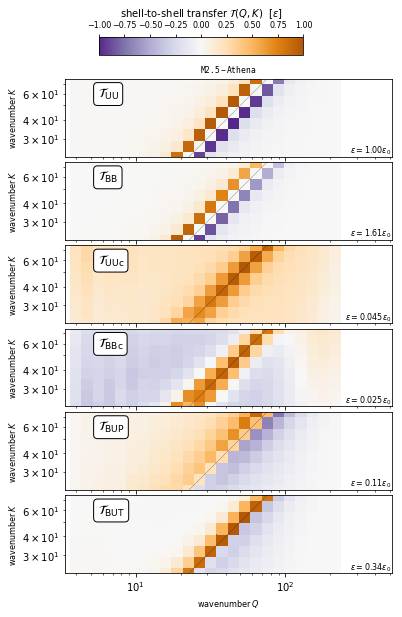

In [40]:
TermsToPlot = [
 'UU',
# 'UUA',

 'BB',
# 'BBA',
 'UUC',    
 'BBC',
 'BUPbb',
# 'UBPbb',
 'BUT',
# 'UBTb',
# 'FU',
# 'PU'
]

    
NumRows = len(TermsToPlot)
#fig, p = subplots(NumRows,len(Ids),sharey='row',
#                  sharex=True,figsize=(33/2.54,18.8/2.54/4. * NumRows))
fig, p = plt.subplots(NumRows,len(Ids),sharey='row',
                  sharex=True,figsize=(TwoColWidth*0.85,TwoColWidth/1.6*NumRows/3.))

p = np.array([p]).T
print("Fix me: dirty array hack so that we can work with 2 indices even for one dataset")


low = 7#[7,7,7,7,7]
up = 16#[30,30,30,30,30]
print("Fix me: lower and upper bounds set independent of data")


RefVals = {}

for i,Id in enumerate(Ids):
    RefVals[Id]= {}
    
    for AnaRes in Simulations[Id]["AnaRess"]:
    #for AnaRes in [1024]:
    
        for j,Term in enumerate(TermsToPlot):
            
                
            thisTerm = Results[Id][AnaRes]["Mean"][Formalism]["ScaleByScaleRaw"]["Log"][Term]["AnyToAny"]

            vmax = addScaleToScalePlotNoShiftLog(p[j,i],thisTerm)
            
            RefVals[Id][Term] = vmax

#            p[j,i].axvspan(low,up, facecolor='black', alpha=0.05)
            p[j,i].set_xscale("log")
            p[j,i].set_yscale("log")
#            p[j,i].grid()
            p[j,i].set_xlim(3.36,512.)
            p[j,i].set_ylim(3.36,512.)
            p[j,i].set_aspect('equal')

#            p[j][-2].legend(loc="upper left",bbox_to_anchor=(1.,1.),
#                           bbox_transform=p[j][-1].transAxes,
#                           fontsize=8,
#                          )   
            
            
            p[j][0].set_ylabel("wavenumber $K$",fontsize=8)
            p[0][i].set_title(IdLabels[Id],fontsize=8)
            p[-1,i].set_xlabel("wavenumber $Q$",fontsize=8)
        
for i,Id in enumerate(Ids):
    
    for AnaRes in Simulations[Id]["AnaRess"]:
    #for AnaRes in [1024]:
    
        for j,Term in enumerate(TermsToPlot):
            
            
            if Term[-1] == 'C':
                p[j,i].text(1.,0.,"$\\varepsilon = %.3f\\varepsilon_0$" % (RefVals[Id][Term]/RefVals[Ids[0]]["UU"]),
                       fontsize=8,
                            horizontalalignment='right',
                            verticalalignment='bottom',
                            transform = p[j,i].transAxes,
                           )
            else:
                p[j,i].text(1.,0.,"$\\varepsilon = %.2f\\varepsilon_0$" % (RefVals[Id][Term]/RefVals[Ids[0]]["UU"]),
                       fontsize=8,
                            horizontalalignment='right',
                            verticalalignment='bottom',
                            transform = p[j,i].transAxes,                            
                           )
            
            
            
            #p[j,i].axvline(0.,color="black",alpha=1.0,lw=0.2)
            p[j,i].plot([0.5,512.],[0.5,512.],color="black",alpha=1.0,lw=0.2)
            if i == 0:
            #    ax2 = p[j,-1].twinx()
            #    ax2.set_ylim(X[3],X[-1])
            #    ax2.set_yscale("log")
            #    ax2.set_ylabel("waven. $k$",fontsize=8)
                
                p[j,0].text(0.1,0.9,"%s" % Labels[Term],
                            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'),
                            fontsize=13,
                            horizontalalignment='left',
                            verticalalignment='top',
                            transform = p[j,i].transAxes,                           
                           )
                
          
            
fig.tight_layout()
fig.subplots_adjust(wspace=0.07,hspace=0.07,top=0.9)
p[j,i].set_xlim(3.36,512.)
cax = fig.add_axes([0.25,0.94,0.5,0.03])
cb = matplotlib.colorbar.ColorbarBase(cax,
             cmap=Cmap,
             norm=matplotlib.colors.Normalize(vmin=-1, vmax=1),
                                 orientation='horizontal',
                                      ticklocation="top",
             )
cb.ax.tick_params(labelsize=8) 
cb.set_label("shell-to-shell transfer $\\mathcal{T} (Q,K)$  $[\\varepsilon]$")

#fig.suptitle("Comparing constancy of individual fluxes in the inertial range")
#fig.savefig("W22-shell-transfer-individual-diag.pdf",dpi=150,bbox_inches="tight")